# <center>**Bioseñales y sistemas**
## <center>**Proyecto procesamiento de señales EMG**
## <center>**Seguimiento 2**
#### Maria Alejandra Escobar - C.C 1004425012
#### Juan Manuel Martínez - C.C 1007739919

## Desarrollo de puntos

In [ ]:
# -- coding: utf-8 --
"""
Created on Wed Sep 21 20:49:08 2022

@author: Francisco Campuzano
"""
import serial, time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


arduino = serial.Serial('COM3',9600,timeout=0.01)# Se debe indicar el puerto serial y la velocidad de transmisión 

time.sleep(2)

numero_datos = 1000 # esto corresponde al numero de datos que se va adquirir, se puede modificar pero 1000 es un buen numero 
EMG = np.ndarray((0),dtype=int) # aquí se almacenará la señal 

# mientras el arreglo no tenga los datos que requiero los solicito
while EMG.shape[0] < numero_datos: 
    
    # esto lee lo que haya en el buffer
    datos = arduino.readlines(arduino.inWaiting())
    print()
    datos_por_leer = len(datos)

    # Si hay mas datos de los que quiero leer
    # solo me quedo con la cantidad que me interesa
    if len(datos) > numero_datos:
        datos = datos[0:numero_datos]
        # creo un arreglo de ceros para leer estos valores
        valores_leidos = np.zeros(numero_datos,dtype = int)
    else:
        # creo un arreglo de ceros para leer estos valores
        valores_leidos = np.zeros(datos_por_leer,dtype = int)

    posicion = 0
    #se convierten los datos a valores numericos de voltaje. 
    for dato in datos:
        # voy a tratar de convertir los datos
        try:
            # elimino los saltos de linea y caracter de retorno y convierto a entero
            valores_leidos[posicion] = int(dato.decode().strip())
        except:
            # si no puedo convertir completo la muestra con el anterior
            # valores_leidos[posicion] = 0  # alternativa
            valores_leidos[posicion] = valores_leidos[posicion-1]
        posicion = posicion + 1
    # agrego los datos leidos al arreglo
    EMG = np.append(EMG,valores_leidos)
    # Introduzco un delay para que se llene de nuevo el buffer
    time.sleep(2)

# como la ultima lectura puede tener mas datos de los que necesito descarto las muestras restantes
EMG = EMG[0:numero_datos]

# ya con los datos leidos podemos graficar
plt.plot(EMG)
#plt.plot(EMG[100:])
plt.show()

arduino.close()  # Cerrar puerto serial, siempre debe cerrarse

In [ ]:
Datos_EMG_S1 = open("EMG_signals/datos_EMG_sujeto9_3","w")
for dato in EMG:
  Datos_EMG_S1.write(str(dato) + "\n")
Datos_EMG_S1.close()

In [30]:
import os
import scipy.io
import numpy as np

# Lista para almacenar las señales
senales = []

# Iterar sobre los archivos en la carpeta
for archivo in os.listdir('EMG_signals'):
    if archivo.endswith('.mat'):
        mat = scipy.io.loadmat(os.path.join('EMG_signals', archivo))
        senal = mat['senal_sin_atipicos']
        
        # Añadir la señal a la lista
        senales.append(senal)

# Convertir la lista de señales en un array de 10 columnas
senales_array = np.column_stack(senales)

# Imprimir el array resultante
print(senales_array.shape)
print(senales_array)

(1000, 10)
[[300.95868717 299.27427192 298.91434217 ... 299.72169536 299.41777436
  297.08744871]
 [300.         297.35181251 300.         ... 299.75912127 300.34484175
  300.        ]
 [300.         291.39725762 327.68949532 ... 299.9523206  300.15284501
  300.        ]
 ...
 [298.1090278  294.33955087 301.45352811 ... 277.04910707 288.20111647
  299.05669494]
 [294.36407723 279.30138442 304.39905552 ... 283.14605054 288.06072442
  283.89704886]
 [302.49709502 298.88309452 299.26462056 ... 298.67992042 298.7409912
  295.55722543]]


In [31]:
#Retiro el Offset
offset = senales_array.mean()
senales_array_f = senales_array-offset
senales_array_f


array([[  1.16541687,  -0.51899838,  -0.87892814, ...,  -0.07157495,
         -0.37549595,  -2.7058216 ],
       [  0.20672969,  -2.4414578 ,   0.20672969, ...,  -0.03414904,
          0.55157145,   0.20672969],
       [  0.20672969,  -8.39601269,  27.89622501, ...,   0.1590503 ,
          0.3595747 ,   0.20672969],
       ...,
       [ -1.68424251,  -5.45371943,   1.66025781, ..., -22.74416324,
        -11.59215384,  -0.73657537],
       [ -5.42919308, -20.49188589,   4.60578521, ..., -16.64721977,
        -11.73254589, -15.89622144],
       [  2.70382471,  -0.91017579,  -0.52864975, ...,  -1.11334989,
         -1.0522791 ,  -4.23604488]])

In [32]:
def tkeo(a):
	i = a[1:-1]**2
	j = a[:-2]*a[2:]
	aTkeo = i-j
 #np.roll 
	return aTkeo

(1000, 10)


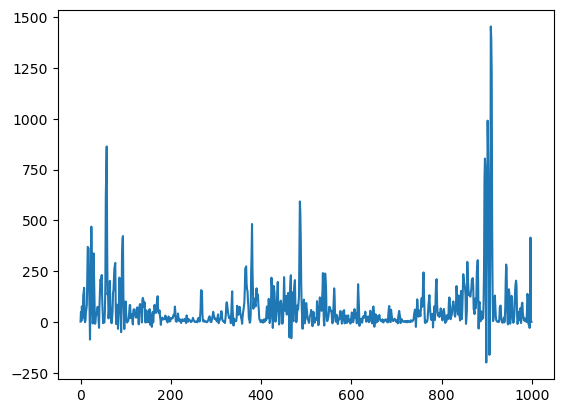

In [33]:
import matplotlib.pyplot as plt
array_tkeo = np.zeros([998,10])
for i in np.arange(10):
    vector_tkeo = tkeo(senales_array_f[:,i])
    array_tkeo[:,i] = vector_tkeo
filas_ceros = np.zeros([2,10])
array_tkeo = np.vstack([array_tkeo,filas_ceros])
print(array_tkeo.shape)
plt.plot(array_tkeo[:,1])
plt.show()

In [34]:
valores_columna = [0] * 200 + [1] * 200 + [0] * 200 + [1] * 200 + [0] * 200 
valores_columna = np.array(valores_columna)
valores_columna = valores_columna.reshape(1000,1)
array_final = np.hstack((senales_array, valores_columna))
array_final_Tkeo = np.hstack((array_tkeo, valores_columna))

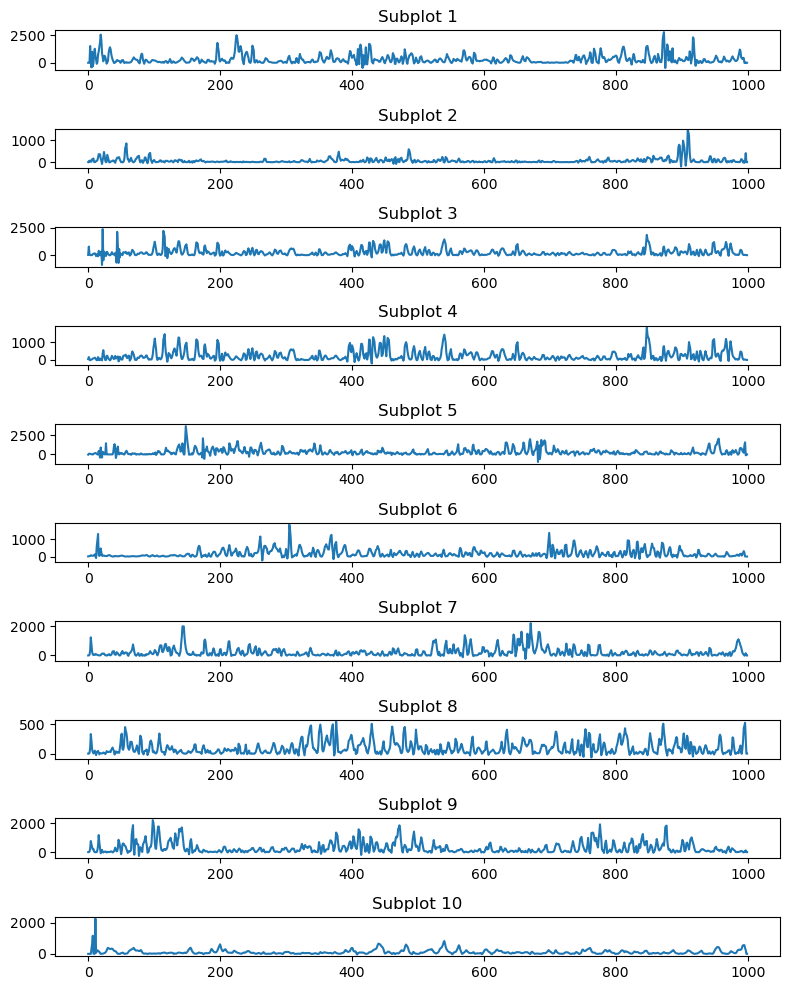

In [35]:
num_subplots = 10
fig, axs = plt.subplots(num_subplots, 1, figsize=(8, 1*num_subplots))  # Ajusta el tamaño de la figura según tus necesidades

for i in range(num_subplots):
    axs[i].plot(array_final_Tkeo[:, i])  # Suponiendo que datos es un arreglo numpy 2D, ajusta según tu estructura de datos
    axs[i].set_title(f'Subplot {i+1}')  # Ajusta el título según lo que desees
    # Puedes agregar más configuraciones aquí según tus necesidades

plt.tight_layout()  # Ajusta automáticamente la disposición de los subplots para evitar superposiciones
plt.show()
    

In [36]:
import pandas as pd
columnas = ['S1', 'S2','S3', 'S4','S5', 'S6','S7', 'S8','S9', 'S10','Movimiento']
Data_Frame_sinTkeo = pd.DataFrame(array_final, columns=columnas)
Data_Frame_Tkeo = pd.DataFrame(array_final_Tkeo, columns=columnas) 
Data_Frame_Tkeo

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,Movimiento
0,-0.198189,1.603199,24.561514,48.714949,-31.296545,7.322699,-0.298916,0.012550,0.439250,0.602111,0.0
1,0.000000,49.149832,779.884046,166.457198,73.996549,13.382554,2.703974,-0.094499,3.841244,0.000000,0.0
2,-8.034341,5.170056,86.181736,38.835083,98.539997,23.597752,36.907821,11.538842,43.032800,0.000000,0.0
3,1529.283561,76.847900,10.892142,-16.789086,71.703394,34.153429,355.058142,94.422617,241.544368,0.000000,0.0
4,170.472937,32.773712,0.879469,14.749978,46.889805,70.789181,1246.976566,334.922526,773.649837,-3.622261,0.0
...,...,...,...,...,...,...,...,...,...,...,...
995,-6.814302,-29.455683,23.952206,23.463169,1199.290206,217.144194,-13.055266,477.374085,48.389482,556.540978,0.0
996,-26.572433,71.787516,20.829694,21.125941,1591.452950,4.467452,26.905764,527.358638,45.702661,370.221014,0.0
997,34.030034,414.953544,22.090952,22.998071,-119.935824,4.280770,154.583898,251.807714,125.454452,249.569690,0.0
998,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [37]:
Data_Frame_sinTkeo_fx = Data_Frame_sinTkeo[Data_Frame_sinTkeo['Movimiento'] == 0]
Data_Frame_sinTkeo_ex = Data_Frame_sinTkeo[Data_Frame_sinTkeo['Movimiento'] == 1]
Data_Frame_sinTkeo_fx

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,Movimiento
0,300.958687,299.274272,298.914342,299.359474,303.446652,299.105048,300.383830,299.721695,299.417774,297.087449,0.0
1,300.000000,297.351813,300.000000,306.318477,301.287628,302.508668,300.128587,299.759121,300.344842,300.000000,0.0
2,300.000000,291.397258,327.689495,313.939600,308.970973,299.719627,300.489819,299.952321,300.152845,300.000000,0.0
3,300.000000,291.051281,291.644095,304.951951,306.641480,294.866871,293.176256,296.285235,293.063498,300.000000,0.0
4,338.863991,291.306823,299.084476,298.929223,294.166370,290.672883,309.666312,304.618597,306.070224,300.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...
995,278.325739,293.620344,294.640940,294.753208,281.701145,283.016346,306.684158,320.766070,299.039752,321.123482,0.0
996,294.376424,301.845032,295.869241,295.981508,320.949571,282.052137,298.089931,300.397676,292.235203,323.049015,0.0
997,298.109028,294.339551,301.453528,301.565796,341.341796,293.975540,302.108883,277.049107,288.201116,299.056695,0.0
998,294.364077,279.301384,304.399056,304.511323,306.166171,298.137314,312.441189,283.146051,288.060724,283.897049,0.0


In [38]:
def calcularRMS(X):
  N=X.size #Cantidad de puntos
  rms=(np.sum(X**(2))/N)**0.5
  return rms

In [39]:
def Func_est(df):
    estadisticas = ['RMS', 'Var', 'MAV', 'MAVS', 'SSC', 'WL', 'ZC']
    lista_move = []
    for i in range(1, 11):
        arreglo = np.array(df[f'S{i}'])
        rms = calcularRMS(arreglo)
        var = np.var(arreglo)
        mean = np.mean(np.abs(arreglo))
        mean_slope = np.mean(np.abs(np.diff(arreglo)))
        sl_sign_c = np.sum(np.abs(np.diff(np.sign(np.diff(arreglo)))))
        wl_values = np.sum(np.abs(np.diff(arreglo)))
        zero_crossings = np.sum(np.diff(np.sign(arreglo)))
        lista = [rms, var, mean, mean_slope, sl_sign_c, wl_values, zero_crossings]
        lista_move.append(lista)
    Df_Estadisticas = pd.DataFrame(lista_move, columns=estadisticas)
    return Df_Estadisticas

In [40]:
Df_estadisticas_sinTkeo_fx = Func_est(Data_Frame_sinTkeo_fx)
Df_estadisticas_sinTkeo_fx

,RMS,Var,MAV,MAVS,SSC,WL,ZC
0,300.202791,223.981783,299.829508,14.374011,578.0,8610.032327,0.0
1,299.469851,57.488533,299.373852,7.512401,646.0,4499.928201,0.0
2,300.216571,210.665280,299.865510,13.385578,558.0,8017.961471,0.0
3,300.126370,197.959010,299.796396,12.809580,538.0,7672.938697,0.0
4,303.423910,175.860725,303.133978,11.988517,560.0,7181.121958,0.0
5,299.832469,86.301267,299.688519,8.071994,528.0,4835.124338,0.0
6,299.984955,125.350851,299.775953,10.867529,580.0,6509.650094,0.0
7,299.486461,59.603049,299.386936,7.224960,576.0,4327.751052,0.0
8,299.523647,214.644906,299.165122,13.341496,568.0,7991.556126,0.0
9,298.156607,113.892209,297.965552,7.193419,382.0,4308.858110,0.0


In [41]:
Df_estadisticas_sinTkeo_ex = Func_est(Data_Frame_sinTkeo_ex)
Df_estadisticas_sinTkeo_ex

,RMS,Var,MAV,MAVS,SSC,WL,ZC
0,300.322167,171.613523,300.036316,11.724919,356.0,4678.242820,0.0
1,299.483154,23.018265,299.444721,4.548700,392.0,1814.931402,0.0
2,299.912048,107.997398,299.731946,9.276162,356.0,3701.188800,0.0
3,300.024249,107.997398,299.844213,9.276162,356.0,3701.188800,0.0
4,303.011336,250.368053,302.597921,15.350780,366.0,6124.961176,0.0
5,299.994788,151.396088,299.742351,11.424424,388.0,4558.345368,0.0
6,300.106160,164.846370,299.831387,11.790605,362.0,4704.451568,0.0
7,299.566804,62.721239,299.462099,7.509999,366.0,2996.489414,0.0
8,299.598508,147.250010,299.352662,11.209277,370.0,4472.501493,0.0
9,297.935801,71.279417,297.816155,5.938987,256.0,2369.655835,0.0


In [42]:
Data_Frame_Tkeo_fx = Data_Frame_Tkeo[Data_Frame_Tkeo['Movimiento'] == 0]
Data_Frame_Tkeo_ex = Data_Frame_Tkeo[Data_Frame_Tkeo['Movimiento'] == 1]

In [43]:
Df_estadisticas_Tkeo_fx = Func_est(Data_Frame_Tkeo_fx)
Df_estadisticas_Tkeo_fx

,RMS,Var,MAV,MAVS,SSC,WL,ZC
0,542.753026,182198.459414,349.718810,194.778478,355.0,116672.308555,1.0
1,178.838565,24124.644380,92.865277,56.350163,451.0,33753.747436,-1.0
2,486.295103,142716.981345,322.293093,182.657841,411.0,109412.046474,-1.0
3,449.869334,113020.709975,303.810589,144.876340,383.0,86780.927523,-1.0
4,469.838043,153987.737805,272.911927,169.508388,461.0,101535.524545,1.0
5,216.788755,30179.656204,133.097282,67.271326,351.0,40295.524090,-1.0
6,340.890197,75544.010621,204.711295,94.781373,415.0,56774.042537,1.0
7,141.718609,11337.149696,95.303419,44.074243,381.0,26400.471658,-1.0
8,529.042320,170079.772444,337.618968,152.397234,395.0,91285.943348,-1.0
9,214.800812,29241.447929,130.757958,42.450019,267.0,25427.561287,-1.0


In [44]:
Df_estadisticas_Tkeo_ex = Func_est(Data_Frame_Tkeo_ex)
Df_estadisticas_Tkeo_ex

,RMS,Var,MAV,MAVS,SSC,WL,ZC
0,453.651834,129851.273141,279.358586,116.866556,236.0,46629.755799,0.0
1,66.433695,3124.218397,36.999181,19.798743,294.0,7899.698647,0.0
2,244.345983,32152.475579,168.808589,72.368986,222.0,28875.225401,2.0
3,244.343699,32152.674707,168.772170,72.406689,222.0,28890.269005,2.0
4,567.969976,167345.554716,408.518365,201.647688,270.0,80457.427474,-2.0
5,352.744408,70553.692738,238.706018,114.237120,230.0,45580.610872,0.0
6,422.880626,112141.456551,263.581104,128.455742,248.0,51253.841204,0.0
7,147.912842,11951.754623,101.721122,45.359040,222.0,18098.257083,0.0
8,373.589448,85584.353818,235.165538,104.632463,232.0,41748.352645,0.0
9,119.876015,7179.656829,85.249019,22.868274,196.0,9124.441203,-2.0


## Informe 

---
### **Historia, aplicaciones y principales industrias de prótesis mioeléctricas**
La construcción de protesis para el reemplazo de extremidades no es una actividad reciente, de hecho, existen registros de que la primera prótesis de mano fue realizada en los años 2000 a.C., fue encontrada una momia, la cual tenía una prótesis unida a su antebrazo. 
Luego de esto, pasaron varios años hasta el registro de la primera protesis de mano fabricada de hierro, la cual le perteneció al general romano Marcus Sergius, durante la segunda guerra Púnica, entre 218 y 202 a.C. En ella portaba su espada, por lo cual era lo suficientemente resistente. 

En el año 1400 se construyó la primera protesis avanzada que poseía una forma muy acercada a la de una mano humana. Fue construida en hierro y constaba de un pulgar rígido y dedos flexibles, los cuales se podían mover manualmente por un sistema pasivo. 

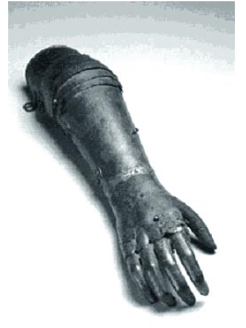

**Mano de alt-Ruppin construida con hierro en el año 1400**


Para el siglo XVI, el médico militar francés Ambroise Paré, desarrolló la primera prótesis móvil al nivel del codo, a la cual llamó "Le petit Loraine". Los dedos podían abrirse o cerrarse presionando o traccionando, además de que constaba de una palanca, por medio de la cual, el brazo podía realizar la flexión o extensión a nivel de codo. 
Además de su funcionalidad, se comenzó la implementaación de materiales tales como el cuero, la madera y polímeros naturales que permitían la fabricación de prótesis más livianas, estéticas y con incluso mayor funcionalidad. entre las innovaciones más importantes al diseño de las prótesis de miembro superior, se encuentra la del alemán Peter Beil. El diseño de la mano cumple con el cierre y la apertura de los dedos pero, es controlada por los movimientos del tronco y hombro contra lateral, dando origen a las prótesis autopropulsadas. Más tarde el Conde Beafort da a conocer un brazo con flexión del codo activado al presionar una palanca contra el tórax, aprovechando también el hombro contra lateral como fuente de energía para los movimientos activos del codo y la mano.

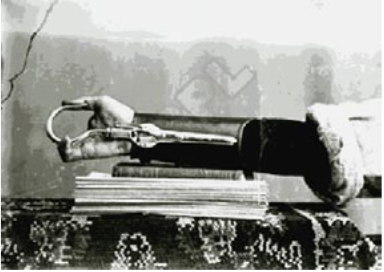

**Prótesis realizada por el conde Beafort**

La aparición de las prótesis activadas por el muñón se da en el siglo XX, gracias a Sauerbruch en Alemania, ya que logra conectar la musculatura flexora del antebrazo con el mecanismo de la mano artificial, mediante varillas de marfil que hacía pasar a través de túneles cutáneos, haciendo posible que la prótesis se moviera de forma activa debido a la contracción muscular. A esto en 1946 se le añaden sistemas neumáticos y eléctricos como sistemas de propulsión asistida. 

En 1960 empiezan a aparecer las prótesis mioeléctricas en Rusia, su funcionamiento se basa en la extracción de pequeñas señales mioléctricas las cuales son procesadas para ordenar el movimiento de la prótesis. En ese entonces, tenían un poder de prensor de dos kilos. Así como esta existieron tres desarrollos similares, Mano Vanduz y mano Bottomley, las cuales no eran adaptativas y cumplían una sóla función. 

Para 1965, un grupo de investigación sueco comenzó a trabajar en una prótesis de mano que fuera adaptativa y que tuviera varias funciones, entre ellas dos tipos de agarre, flexión y extensión de la muñeca, además de supinación-pronación. 

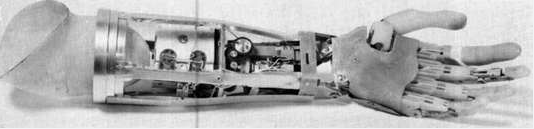

**Prótesis SVEN-Hand, realizada por un grupo d einvestigación sueco que con multiples funcionalidades**

Hasta el momento, el control y desarrollo de prótesis se basaba en el uso de sistemas neumáticos, sin embargo este sistema era difícil de implementar en los Estados Unidos, ya que el gas utilizado era costoso, de difícil mantenimiento y escaso. Por lo cual se optó por la construcción de prótesis electrónicas, las cuales eran más económicas pero muy ruidosas y poco eficientes. 

El brazo Edinburgh fue la primera prótesis de brazo completo construida, se manejaba a través de movimientos en el hombro. El control a través de las señales mioeléctricas era notable. Los niños la manejaban de manera natural sin tener un entrenamiento. 

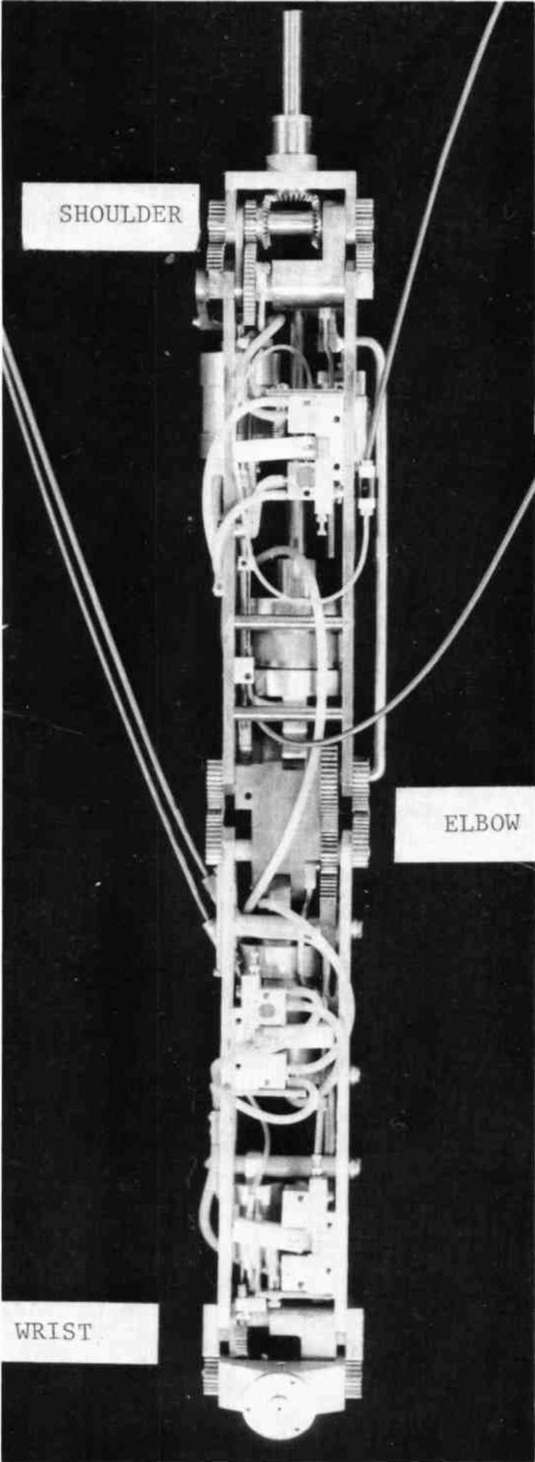

La primera prótesis comercial en Estados Unidos fue la mano Viennatone, producto de dos empresas muy grandes, que son la Otto Bock Orthopedic Industries, una empresa de prótesis alemana, y Viennatone, una empresa de asistencia de audición con experiencia en electrónica. 

Se observa que a lo largo del recorrido historico y en la tendencia actual las prótesis mioeléctricas son mayormente utilizadas para reemplazos de extremidades superiores, sin embargo, existen algunos estudios y productos en el mercado de protesis inferiores basadas en control mioeléctrico. 

Según Medical Expo, algunas empresas con desarrollos en manos mioeléctricas son College Park, Steeper, Proteor, Exii, super motorica y BrainRobotics. Otras empresas tales como la compañía Británica Open Bionics, con premios internacionales por su desarrollo en este campo, realizan prototipos y diseños personalizados con la ayuda de tecnologías de diseño computacional e impresiones 3D. 


---
### **Aplicaciones de las señales de EMG**
Las señales EMG tienen múltiples aplicaciones para el diagnóstico de enfermedades e investigación. Entre las plicaciones reportadas en este informe están: 

**1. Clasificación de hipopneas como obstructivas o centrales**

Cuando se procesa adecuadamente, la actividad de la electromiografía de superficie (EMG) en la pared torácica ofrece una métrica del esfuerzo inspiratorio (CW-EMG-EF) que puede ayudar a clasificar la hipopnea como obstructiva o central. En una investigación particular, las señales EMG se capturaron utilizando el amplificador PSG-1100; estas señales se obtuvieron en la configuración de corriente alterna bipolar, empleando dos electrodos adhesivos colocados a 2 cm de distancia en el octavo espacio intercostal en la línea axilar derecha. La aplicación de filtros de baja y alta frecuencia a 10 y 100 Hz respectivamente se llevó a cabo de acuerdo con las pautas descritas en el Manual de puntuación de la Academia Estadounidense de Medicina del Sueño (AASM). Además, se mantuvo meticulosamente la idoneidad de una impedancia de los electrodos inferior a 10.000 ohmios.

Para procesar la señal EMG, se utilizó una aplicación de software personalizada para eliminar el artefacto ECG de la señal mediante el uso de un filtro adaptativo, que garantizaba una alineación temporal precisa con la señal EMG original. Además, se obtuvo una señal de amplitud indicativa del esfuerzo inspiratorio (CW-EMG-EF) calculando la potencia de la raíz cuadrada media de la señal CW-EMG filtrada mediante un ECG [4].


**2. Evaluación de la actividad muscular en adultos mayores y el entrenamiento de resistencia.**

En otra investigación, la señal EMG se utilizó para medir la actividad eléctrica de los músculos cuádriceps en respuesta a diversas formas de entrenamiento de resistencia (RET) y actividades de la vida diaria (ADL). El objetivo era determinar las posibles disparidades en la actividad electromagnética del cuádriceps entre personas jóvenes y de edad avanzada. Concretamente, el objetivo era evaluar el impacto de la edad en la adaptación muscular al entrenamiento de resistencia y determinar si determinados tipos de RET, como el uso de bandas elásticas o máquinas, ejercen diversos efectos sobre la actividad muscular [5].

**3. Accionamiento de un sistema de supresión de temblores en pacientes con Parkinson empleando señales EMG**

En el curso de una investigación, se diseñó una combinación especializada de hardware y software para identificar y mitigar los temblores durante la fase de captura de la señal de electromiografía (EMG). Se aplicaron dos métodos distintos para suprimir los temblores: una órtesis mecánica regida por un servomotor y un marco de estimulación eléctrica funcional (FES), ambos accionados por electromiografía (EMG). La configuración del hardware incluye una placa de preprocesamiento que aloja un amplificador diferencial para la adquisición de señales EMG, un filtro de paso bajo con un límite de 500 Hz para disminuir las señales extrañas y un filtro de muesca ajustado a 60 Hz para mitigar las interferencias en la línea eléctrica [6].


 ---
 ### **Adquisición de señales EMG: Propuestas**

Para mejorar la fijación de los sensores se propone realizar una corracta limpieza de la zona de la piel del sujeto donde se van a fijar los electrodos, utilizando alcohol. Es importante dejar  secar los electrodos durante un tiempo prudente de 2-3 minutos después de habrlos retirado de la piel de un sujeto, para dejar que el gel y la silicona de la superficie recuperen su adherencia antes de utilizarlos con otro sujeto.

A pesar de que los electrodos pueden utilizarse en repetidas ocasiones, se propuso cambiar los electrodos a utilizar en la medición de EMG luego de que estos hayan sido utilizados en un máximos de 3 pacientes pues estos pueden perder la adeherencia y la calidad de la señal que se obtiene como resultado de la medidicón puede verse afectada para su posterior análisis.

Por otro lado, la mejor ubicación de los electrodos para capturar el movimiento de flexión-extensión de codo es ubicarlos en el músculo biceps braquial con los electrodos posicionados de manera vertical en el sentido de las fibras del músculo. Además, los electrodos deben estar lo más lejos posible de la inervación del músculo y la zona de los tendones para capturar lo mejor posible el biopotencial a registrar [7]. Sin embargo, en el protocolo se va a proponer tomar la señal EMG de flexión y extensión de codo en el músculo braquioradial del antebrazo dado que se pueden obtener buenos resultados del biopotencial registrado con este músculo. Además, para evitar artefactos de movimiento por el posicionamiento de los electrodos, y evitar contaminación de EKG puesto que este músculo está más lejos del corazón, mientras que el biceps se encuentra más cerca a esta zona y es más susceptible a esta contaminación.

---
### **Posibilidades de procesamiento de datos de señales EMG en sistemas embebidos**
En el artículo "PSoC-based embedded system for the acquisition of EMG signals with Android mobile device display" se presenta el desarrollo de un sistema embebido para la adquisición y procesamiento de señales electromiográficas (EMG) de superficie, utilizando la tecnología PSoC de Cypress Semiconductor. La integración de las etapas de filtrado, digitalización y procesamiento en un solo chip permitió reducir el consumo de recursos y el uso de componentes pasivos. Se implementó un filtro pasa banda de cuarto orden Butterworth configurado por software para las señales EMG de 20 a 500 Hz. Se empleó un convertidor analógico-digital delta-sigma integrado con una frecuencia de muestreo de 2 kHz y 14 bits de resolución. La comunicación inalámbrica se realizó mediante Bluetooth con un dispositivo móvil Android, donde se desarrolló una aplicación para visualizar las señales EMG en tiempo real. El prototipo final integró dos canales de adquisición de señales EMG en un diseño compacto y reprogramable, gracias a los recursos de PSoC [8].


También existen enfoques novedosos para la clasificación en el dominio del tiempo de señales EMG multicanal, provenientes de sensores ubicados aleatoriamente, según los movimientos de muñeca y mano que las generaron. En el artículo "EMG Wrist-hand Motion Recognition System for Real-time Embedded Platform" se propone un conjunto pequeño de características de dominio temporal, junto con el análisis discriminante de Fisher kernel (KFD) para la proyección de características y una red neuronal de función de base radial (RBF) para la clasificación. Con este enfoque, se logró una precisión de clasificación superior al 99% para nueve movimientos de muñeca y mano, superando el estado del arte. Además, se demuestra que el tiempo de procesamiento en un procesador ARM Cortex-A53 es suficiente para el procesamiento en tiempo real, con una latencia de 4,5 ms, lo que representa un factor de 50 veces más rápido que las técnicas líderes en el dominio tiempo-frecuencia. Este enfoque de baja complejidad computacional es prometedor para aplicaciones portátiles y con restricciones de energía, como prótesis de extremidades [9].

---
### **Metodología**
 
Se creó un protocolo para la toma de señales electromiográficas durante los movimiento de fleción y extención de codo,en el cual se describen la población de estudio, el montaje de los electródos, el tipo de ejercicio y la duración del mismo y la forma de onda esperada después de captada la señal. Dichos apartados se describen a continuación:

**Población de estudio:** Jóvenes entre los 14 y 23 años en condiciones normales que no presenten patologías relacionadas con el sistema musculo-esquelético, excluyendo a deportistas de alto rendimiento. Adicionalmente se buscan sujetos con poca presencia de vellos en la zona del antebrazo y zonas cercana a la articulación del codo. 

**Montaje de los electrodos:** El montaje de los electrodos se realizará en el músculo braquioradial un músculo principal de la flexión y extensión en el codo. Se ubicarán dos electrodos a lo largo de la fibra del músculo y el electrodo de referencia se ubicará en la articulación del hombro, en la zona de mayor pretuberancia del hueso. 

**Tipo de ejercicio a realizar durante el registro:** Para el experimento el sujeto estará de pie, con una posición vertical del antebrazo, una aducción horizontal del hombre entre los 0 y 10°, procurando una posición natural. Debe flexionar el codo entre hasta 90° para favorecer la flexión completa del codo. La articulación de la muñeca va a estar completamente inactiva, por lo cual se le dirá al sujeto que debe procurar mantener la articulación estática con el brazo en posición de de supinación completa. El sujeto realizará flexión de codo con un carga de 5kg para favorecer una activación alta del músculo, y ralizará flexión en 2 segundos, luego extensión en 2 segundos, así sucesivamente hasta completar 3 flexiones y 2 extensiones del codo intercaladas. La prueba se realizará por un minuto, en el cual con la ayuda de un cronómetro.

**Forma de onda esperada para el tipo de ejercicio:** La forma de onda esperada es una señal que presente valores altos en forma de picos en los tiempos correspondientes a flexión (0-200, 400-600, 800-1000) y valores menores, con picos de mucho menos amplitd en los tiempos correspondientes a extensión. Se esperan ver 3 zonas de picos de mucha amplitd que corresponden a 3 flexiones del brazo, y 2 zonas de valores menores con menor amplitud correspondiente a 2 flexiones realizadas por los sujetos.

---
### **Resultados**

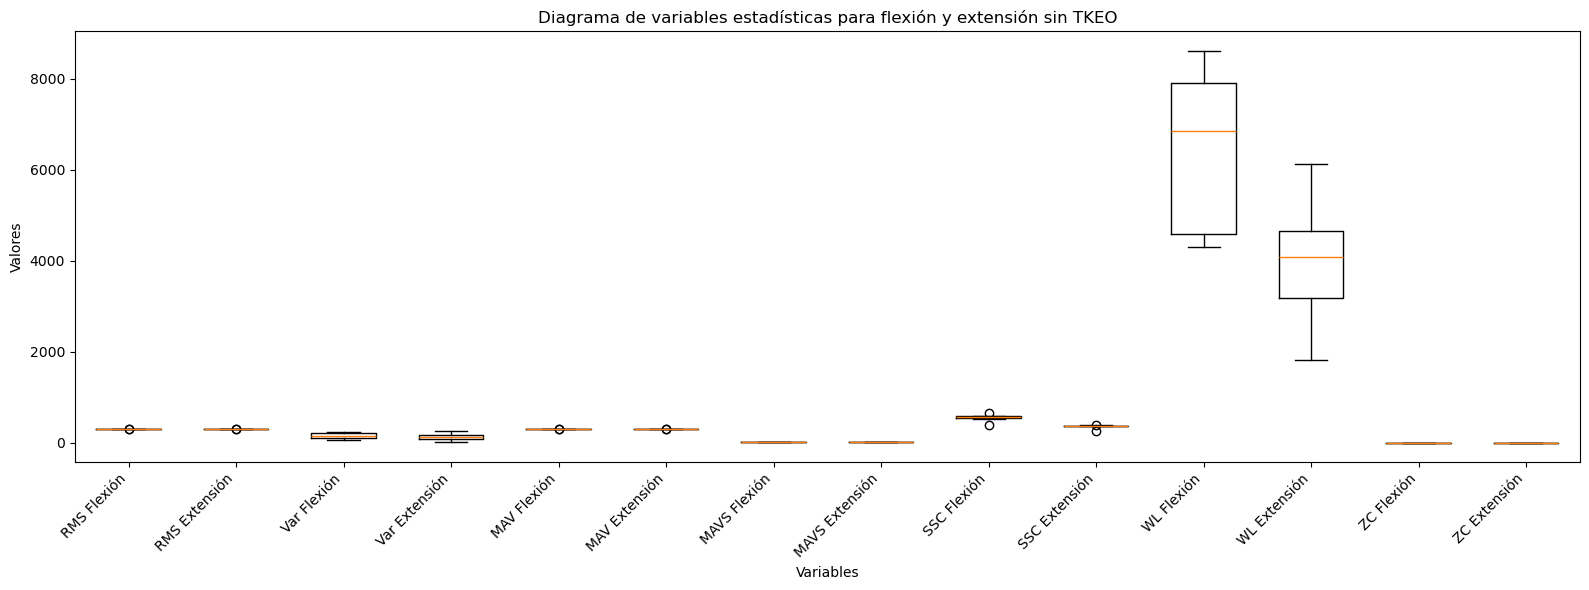

In [25]:
#BOXPLOT VARIABLES SIN TKEO

Flexion = []
extension = []

# Iterar sobre los números del 1 al 8 (utilizando np.arange(1, 9))
estadisticas = ['RMS', 'Var', 'MAV', 'MAVS', 'SSC', 'WL', 'ZC']
for i in np.arange(0, 7):
    lista_fx_sinT = list(Df_estadisticas_sinTkeo_fx[estadisticas[i]])
    Flexion.append(lista_fx_sinT)
    lista_ex_sinT = list(Df_estadisticas_sinTkeo_ex[estadisticas[i]])
    extension.append(lista_ex_sinT)


# Listas para almacenar los datos intercalados y las etiquetas intercaladas
datos_intercalados = []
etiquetas_intercaladas = []

# Intercalar los datos con Tkeo y sin Tkeo para cada canal
for i in np.arange(0,7):
    datos_intercalados.extend([Flexion[i], extension[i]])
    etiquetas_intercaladas.extend([f'{estadisticas[i]} Flexión', f'{estadisticas[i]} Extensión'])

# Posiciones para los boxplots
posiciones = np.arange(1, 15)

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(16, 6))

# Graficar los boxplots
bplot1 = ax.boxplot(datos_intercalados, positions=posiciones, widths=0.6)

# Añadir etiquetas
ax.set_xticks(posiciones)
ax.set_xticklabels(etiquetas_intercaladas, rotation=45, ha='right')

# Añadir títulos
ax.set_title('Diagrama de variables estadísticas para flexión y extensión sin TKEO')
ax.set_xlabel('Variables')
ax.set_ylabel('Valores')

# Mostrar la gráfica
plt.tight_layout()
plt.show()

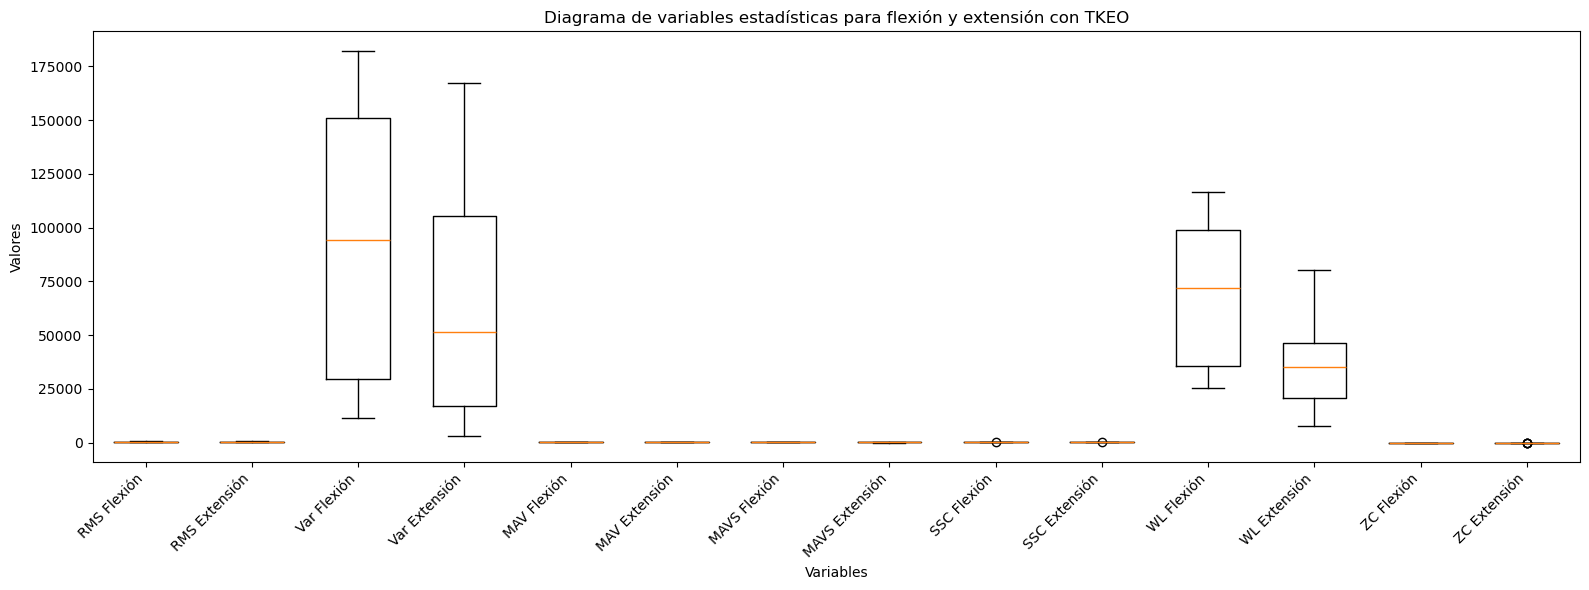

In [26]:
#BOXPLOT VARIABLES CON TKEO

Flexion = []
extension = []

# Itera sobre las columnas del 1 al 8 (utilizando np.arange(1, 8))
estadisticas = ['RMS', 'Var', 'MAV', 'MAVS', 'SSC', 'WL', 'ZC']
for i in np.arange(0, 7):
    lista_fx_Tkeo = list(Df_estadisticas_Tkeo_fx[estadisticas[i]])
    Flexion.append(lista_fx_Tkeo)
    lista_ex_Tkeo = list(Df_estadisticas_Tkeo_ex[estadisticas[i]])
    extension.append(lista_ex_Tkeo)


# Listas para almacenar los datos intercalados y las etiquetas intercaladas
datos_intercalados = []
etiquetas_intercaladas = []

# Intercalar los datos con Tkeo y sin Tkeo para cada canal
for i in np.arange(0,7):
    datos_intercalados.extend([Flexion[i], extension[i]])
    etiquetas_intercaladas.extend([f'{estadisticas[i]} Flexión', f'{estadisticas[i]} Extensión'])

# Posiciones para los boxplots
posiciones = np.arange(1, 15)

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(16, 6))

# Graficar los boxplots
bplot1 = ax.boxplot(datos_intercalados, positions=posiciones, widths=0.6)

# Añadir etiquetas
ax.set_xticks(posiciones)
ax.set_xticklabels(etiquetas_intercaladas, rotation=45, ha='right')

# Añadir títulos
ax.set_title('Diagrama de variables estadísticas para flexión y extensión con TKEO')
ax.set_xlabel('Variables')
ax.set_ylabel('Valores')

# Mostrar la gráfica
plt.tight_layout()
plt.show()

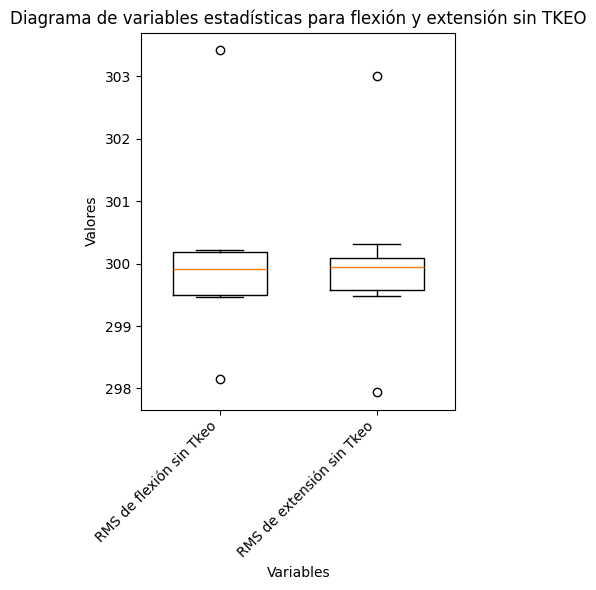

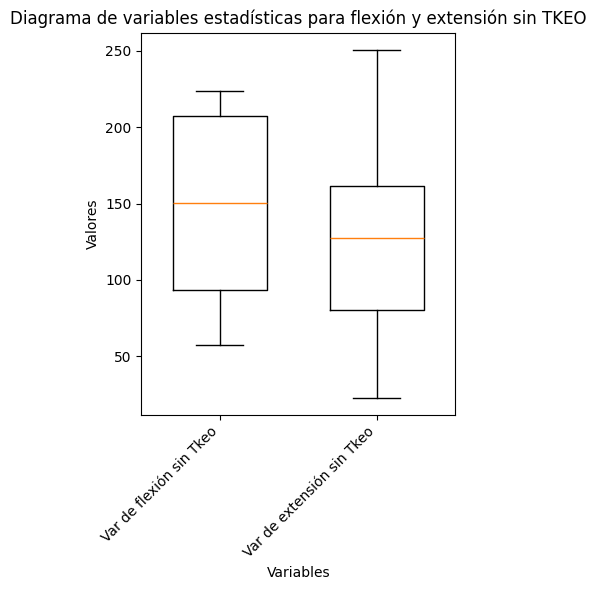

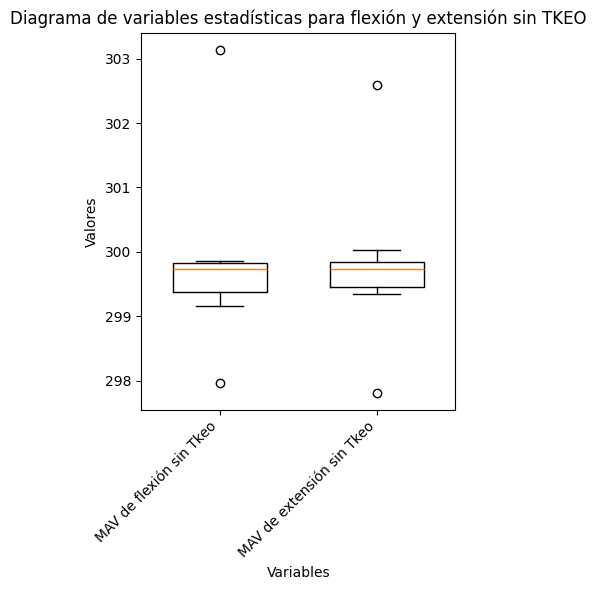

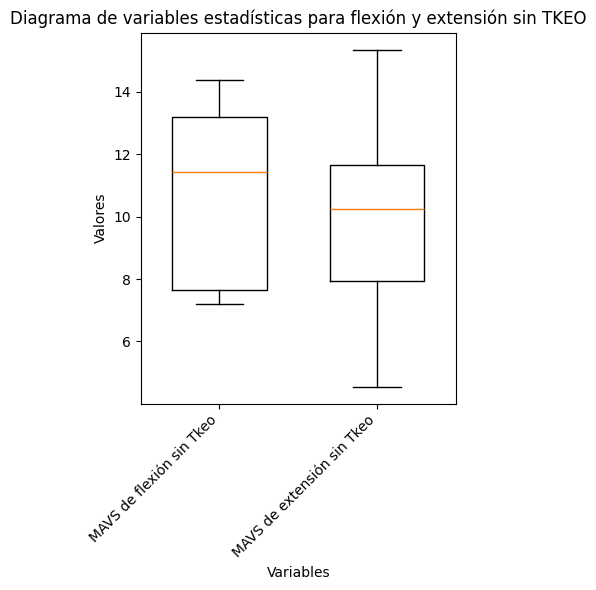

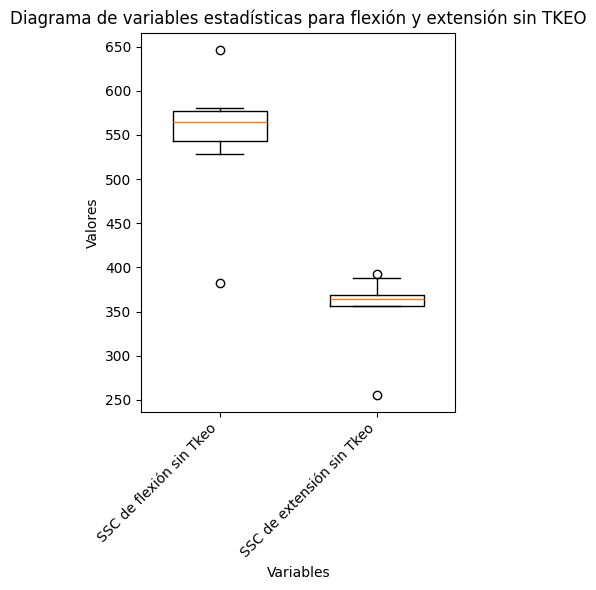

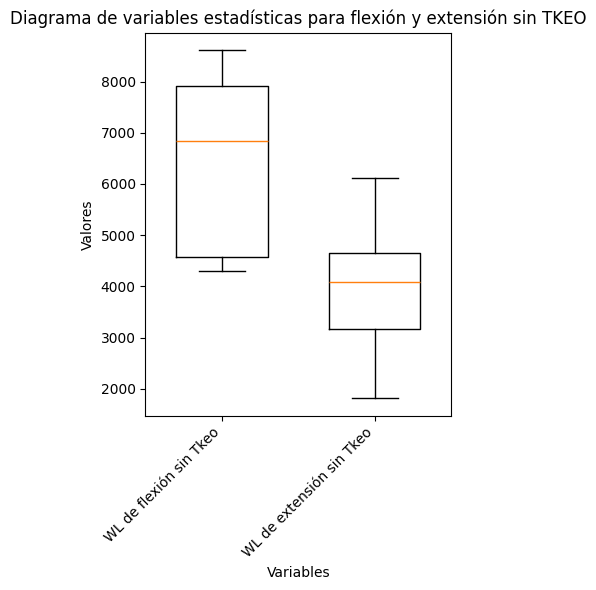

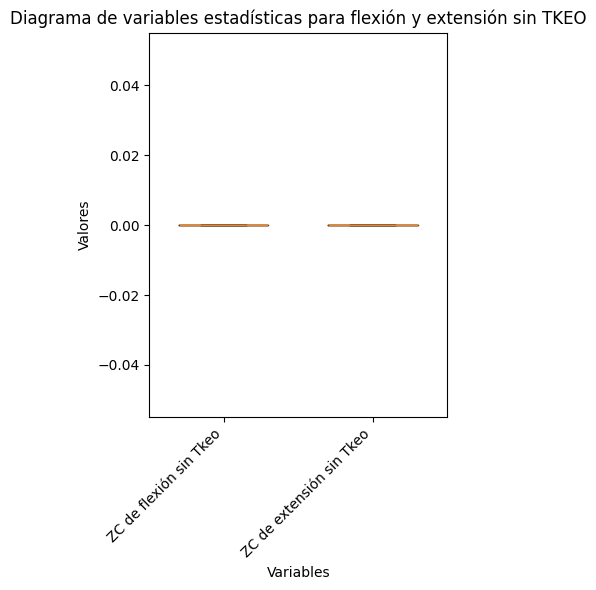

In [ ]:
#BOXPLOT VARIABLES SIN TKEO

estadisticas = ['RMS', 'Var', 'MAV', 'MAVS', 'SSC', 'WL', 'ZC']
posiciones = np.arange(1, 3)


for i in np.arange(0, 7):
    lista_RMSfx_sinT = list(Df_estadisticas_sinTkeo_fx[estadisticas[i]])
    lista_RMSex_sinT = list(Df_estadisticas_sinTkeo_ex[estadisticas[i]])
    fig, ax = plt.subplots(figsize=(4, 6))
    bplot1 = ax.boxplot([lista_RMSfx_sinT,lista_RMSex_sinT], positions=posiciones, widths=0.6)
    ax.set_xticks(posiciones)
    ax.set_xticklabels([f'{estadisticas[i]} de flexión sin Tkeo', f'{estadisticas[i]} de extensión sin Tkeo'], rotation=45, ha='right')

    ax.set_title('Diagrama de variables estadísticas para flexión y extensión sin TKEO')
    ax.set_xlabel('Variables')
    ax.set_ylabel('Valores')

    plt.tight_layout()
    plt.show()

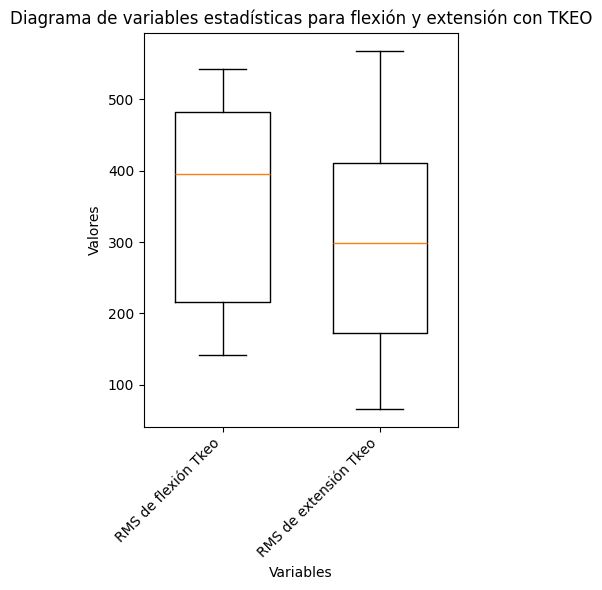

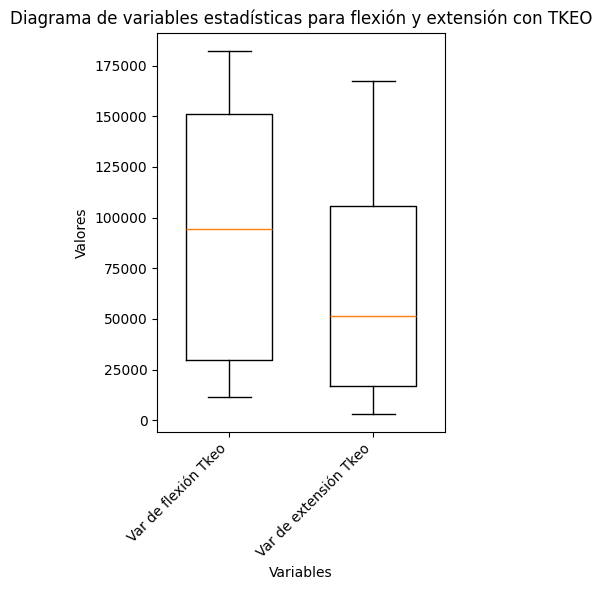

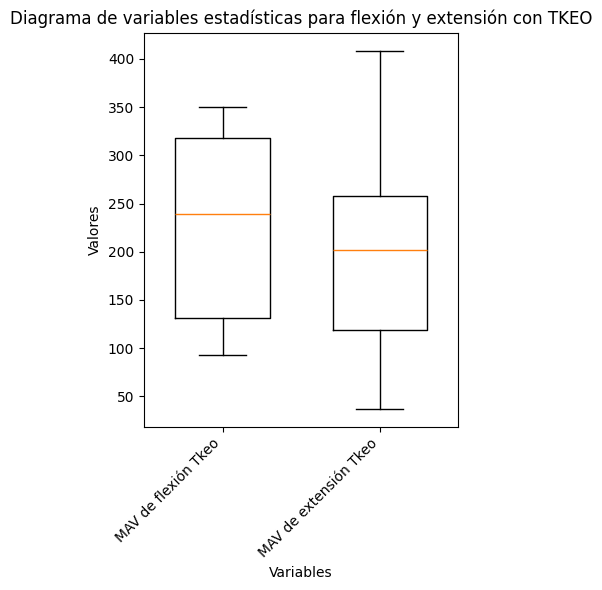

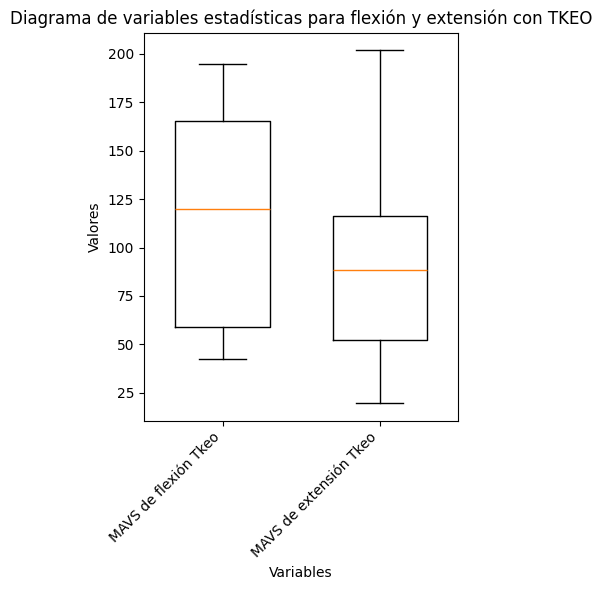

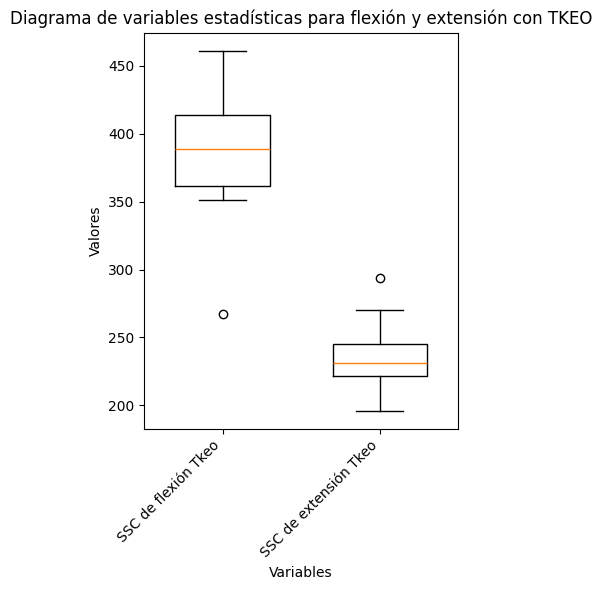

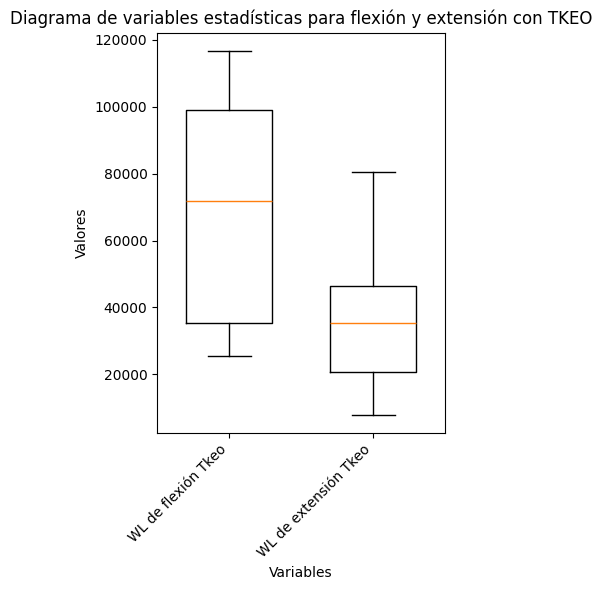

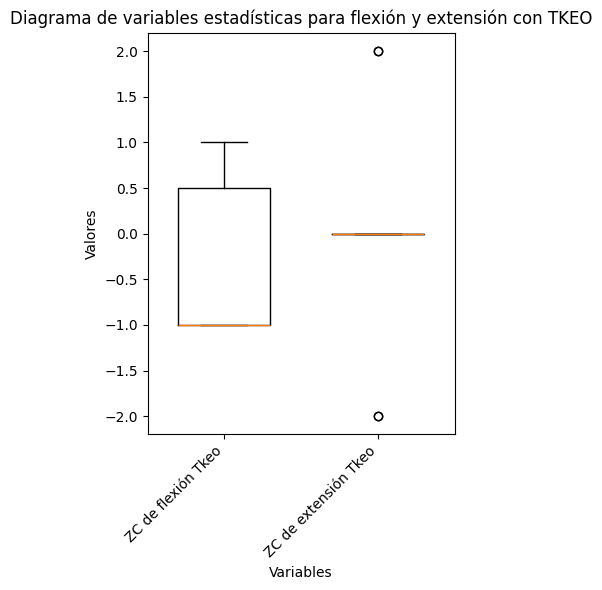

In [ ]:
Flexion = []
extension = []

estadisticas = ['RMS', 'Var', 'MAV', 'MAVS', 'SSC', 'WL', 'ZC']
posiciones = np.arange(1, 3)


for i in np.arange(0, 7):
    lista_RMSfx_T = list(Df_estadisticas_Tkeo_fx[estadisticas[i]])
    lista_RMSex_T = list(Df_estadisticas_Tkeo_ex[estadisticas[i]])
    fig, ax = plt.subplots(figsize=(4, 6))
    bplot1 = ax.boxplot([lista_RMSfx_T,lista_RMSex_T], positions=posiciones, widths=0.6)
    ax.set_xticks(posiciones)
    ax.set_xticklabels([f'{estadisticas[i]} de flexión Tkeo', f'{estadisticas[i]} de extensión Tkeo'], rotation=45, ha='right')

    ax.set_title('Diagrama de variables estadísticas para flexión y extensión con TKEO')
    ax.set_xlabel('Variables')
    ax.set_ylabel('Valores')

    plt.tight_layout()
    plt.show()

---
**Pruebas estadísticas**

Se escogió la variabel SSC como variable de interés para aplicarl pruebas estadísticas, pues a partir de el análisis exploratorio y su comportamientos en el diagrama de cajas y bigotes sugería tener una distribución y medianas diferenciadas para los movimientos de flexión y extensión.

In [45]:
import scipy.stats as stats
def normalidad_datos(data1,data2,data3,data4,columna):
  data1 = np.array(data1[columna])
  data2 = np.array(data2[columna])
  data3 = np.array(data3[columna])
  data4 = np.array(data4[columna])
  lista = [data1,data2,data3,data4]
  t = [0,0,1,1]
  
  alpha=0.05
  resultados_data = []
  
  for i in np.arange(0,4):
    _, valor_normal = stats.shapiro(lista[i])
    if valor_normal<alpha:
          resultado='Se rechaza la H0, los datos no tienen una distribución normal'
    else:
        resultado='Se acepta la H0, los datos tienen una distribución normal'

    resultados_data.append({
      'Operador TKEO': t[i],
      'Variable': columna,
      'Valor p': valor_normal,
      'Resultado': resultado})

  resultados_df = pd.DataFrame(resultados_data)
  return resultados_df

def homocedasticidad_datos(data1,data2,data3,data4,columna):
  #Función que aplica la prueba Levene sobre pares de datos.
  #H0:Los datos presentan hocedasticidad.
  #H1: Los datos no presentan hocedasticidad.
  #Intervalo de confianza de 95%.
  alpha=0.05
  resultados_data = []
  data1 = np.array(data1[columna])
  data2 = np.array(data2[columna])
  data3 = np.array(data3[columna])
  data4 = np.array(data4[columna])
  lista = [data1,data3,data2,data4]

  for i in np.arange(0,2):
    valor_levene, valor_critico = stats.levene(lista[i],lista[i+2])
    if valor_levene < alpha:
      resultado='Se rechaza H0, los datos no presentan homocedasticidad'
    else:
      resultado='Se acepta H0, los datos presentan homocedasticidad'

    resultados_data.append({
        'Operador TKEO': i,
        'Variable': columna,
        'Valor p': valor_levene,
        'Resultado': resultado})

  resultados_df = pd.DataFrame(resultados_data)
  return resultados_df

def prueba_MannW (data1,data2,columna):
  #Función que aplica la prueba t-student sobre pares de datos.
  #H0:La media de los dos grupos es igual.
  #H1:La media de los dos grupos no es igual.
  #Intervalo de confianza de 95%.
  alpha=0.05
  resultados_data = []
  data1 = np.array(data1[columna])
  data2 = np.array(data2[columna])
  
  
  _ , p_value =stats.mannwhitneyu(data1,data2)
  
  if p_value < alpha:
    resultado='Se rechaza H0, la mediana es diferente.'
  else:
    resultado='Se acepta H0, la mediana es igual'

  resultados_data.append({
            'Operador TKEO': 0, 
            'Variable': columna,
            'Valor p': p_value,
            'Resultado': resultado})

  resultados_df = pd.DataFrame(resultados_data)
  return resultados_df

def prueba_t_student (data1,data2,columna):
  #Función que aplica la prueba t-student sobre pares de datos.
  #H0:La media de los dos grupos es igual.
  #H1:La media de los dos grupos no es igual.
  #Intervalo de confianza de 95%.
  alpha=0.05
  resultados_data = []
  data1 = np.array(data1[columna])
  data2 = np.array(data2[columna])

  _ , p_value =stats.ttest_ind(data1,data2)

  if p_value < alpha:
    resultado='Se rechaza H0, la media es diferente.'
  else:
    resultado='Se acepta H0, la media es igual'

  resultados_data.append({
        'Operador TKEO': 0,
        'Variable': columna,
        'Valor p': p_value,
        'Resultado': resultado})

  resultados_df = pd.DataFrame(resultados_data)
  return resultados_df

In [46]:
resultados = normalidad_datos(Df_estadisticas_sinTkeo_fx,Df_estadisticas_sinTkeo_ex,Df_estadisticas_Tkeo_fx,Df_estadisticas_Tkeo_ex,'SSC')
resultados

,Operador TKEO,Variable,Valor p,Resultado
0,0,SSC,0.010763,"Se rechaza la H0, los datos no tienen una dist..."
1,0,SSC,0.000474,"Se rechaza la H0, los datos no tienen una dist..."
2,1,SSC,0.510241,"Se acepta la H0, los datos tienen una distribu..."
3,1,SSC,0.315262,"Se acepta la H0, los datos tienen una distribu..."


In [47]:
homocedasticidad_datos(Df_estadisticas_sinTkeo_fx,Df_estadisticas_sinTkeo_ex,Df_estadisticas_Tkeo_fx,Df_estadisticas_Tkeo_ex,'SSC')

,Operador TKEO,Variable,Valor p,Resultado
0,0,SSC,0.834443,"Se acepta H0, los datos presentan homocedastic..."
1,1,SSC,2.454154,"Se acepta H0, los datos presentan homocedastic..."


In [48]:
prueba_MannW(Df_estadisticas_sinTkeo_fx,Df_estadisticas_sinTkeo_ex,'SSC')

,Operador TKEO,Variable,Valor p,Resultado
0,0,SSC,0.000321,"Se rechaza H0, la mediana es diferente."


In [49]:
prueba_t_student(Df_estadisticas_sinTkeo_fx,Df_estadisticas_sinTkeo_ex,'SSC')

,Operador TKEO,Variable,Valor p,Resultado
0,0,SSC,2.580809e-07,"Se rechaza H0, la media es diferente."


---

### **Discusión**

Se graficaron las variables estadísticas halladas para los datos de movimiento de flexión y extensión estableciendo una comparación entre ambos movimientos y cómo se podrían predecir cada uno de ellos a partir de una variable estadística representativa.

En los gráficos de cajas y bigotesobtenidos en el análsiis exploratorio, se buscó encontrar relaciones existentes entre las variables estadísiticas estudiadas y los movimientos que se realizaron durante la prueba; Así mismo, se quiere identificar como la transformación de la señal con el operador TKEO (Teager-Kaiser Energy Operator) puede ayudar a identificar estos movimientos a través de sus variables estadísticas de una mejor manera. Al trazar el primer gráfico, se notaba que las magnitudes de las variable estadísticas variaban en gran medidad por lo cual, posteriormente se graficaron por separado para hacer una análisis detallado de cada una.

A diferencia de los resultados de la primera etapa de este proyecto, se obtuvo una transformación siginificativa de las señales de EMG luego de aplicar el operador TKEO, lo cual facilitó la visualización de los patrones de las señales y la zonas de la señal donde se presentó mayor activación muscular para facilitar su análisis.

Siguiendo con los resultados y discusiones obtenidos en la primera etapa del proyecto, donde se evidenció que las señales que se les aplica el operador TKEO y las que no se les aplica el operador no son comparables por magnitud, así que en esta etapa se establecieron comparaciones de variables estadísticas en cada uno de los movimiento ahora dentro de un mismo grupo de señales con operador aplicado o no, siendo de más interés la señal con TKEO puesto que resultó muy util para resaltar las zonas de activación muscular en cada movimiento.

En primera instancia, se escogió la variable 'SSC' (slope sign changes) como variables de interés para analizar dado que en el diagrama de cajas y bigotes demostró tener una distribución bastante diferenciada respecto a los movimientos de flexión y extensión del codo, las medias de las cajas se encontraron los suficientemente distanciadas para inferir que existían diferencias relevantes entre los datos de los sujetos filtrados por flexión y extensión. Además, esta es una medida que puede ser util para detectar patrones de activación muscular o evaluar regularidad de la señal contando el numero de veces que su pendiente cambia de signo.

Se realizaron pruebas estadísticas de la variable SSC comparandola entre flexión y extensión entre comparandolas dentro de mismos grupos los grupos de señales sin TKEO y con TKEO. Se observó que la aplicación del operador TKEO muestra distirbución normal. Por otro lado los datos de flexión y extensión se asumieron independientes entre sí porque un movimiento no depende del otro. Finalmente,  tanto la prueba de Mann Whitney como la de t student, arrojaron que las medianas y medias de los movimientos son diferentes, por lo cual esto puede ser un indicio para clasificar los movimientos. 

---
### **Conclusiones**

En una investigación con señales de EMG es importante tener en cuenta que tener un protocolo muy claro, estricto y que los investigadores tengan suficiente control sobre la aplicación del mismo por el paciente, puede evitar desfases en los tiempos de la señal y por lo tanto que datos de diferentes grupos no queden solapados y no entorpezcan el análisis estadístico. Aplicar de manera correcta el ptotocolo e incluso contar con dispositivos que permitan controlar el movimiento de los sujetos, puede asegurar mejores resultados en una investigación de EMG.

A diferencia de lo obtenido en la primera fase del proyecto, el valor de la variable estadísitca RMS no fue útil para diferenciar la señales EMG obtenidas durante la flexión y la extensión del músculo braquioradial, puesto que no existió una clara diferencia entre la energía de las señales por posible ruido de la señal y solapamiento de valore de extensión y flexión juntos. Teóricamente existe diferencia, ya que durante la flexión, el músculo braquioradial presenta una actividad elevada en comparación a la flexión. Sin embargo, esto no se vió evidenciado en los diagramas, lo cual se puede ver explicado por varias razones, entre ellas que en las señales EMG tomadas no existe uma diferencia tan elevada entre la activación muscular y la fase de relajación.

La señales de EMG son señales contaminadas de mucho ruido, que se puede ver incrementado en las zonas de entensión del músculo y que pueden hacer complejo el análisis. Sin embargo, en el desarrollo de esta fase del proyecto el operador TKEO demostró ser de gran utilidad para un procesamiento efectivo de las señales y diferenciar de manera clara la zonas de extensión y flexión del músculo, a diferencia de lo obtenido anteriormente en el proyecto. 
 

---
### **Fuentes bibliográficas**

**[1]** J. M. Dorador Gonzáles, P. Rios Murillo, I. Flores Luna, and A. Juárez Mendoza, “Robótica y prótesis inteligentes,” Revista Digital Universitaria UNAM, vol. 6, no. 1, p. 15, 2004. [Online]. Available: http://www.revista.unam.mx/vol.6/num1/art01/int01.htm

**[2]** CHILDRESS, Dudley S. Historical aspects of powered limb prostheses. Clin Prosthet Orthot, 1985, vol. 9, no 1, p. 2-13.

**[3]** Medical Expo. https://www.medicalexpo.es/fabricante-medical/protesis-mano-mioelectrica-52205.html. consulted 08-abr-2024

**[4]** R. B. Berry, S. Ryals y M. H. Wagner, “Use of chest wall EMG to classify hypopneas as obstructive or central”, J. Clin. Sleep Medicine, vol. 14, n.º 05, pp. 725–733, mayo de 2018. [En línea]. Disponible: https://doi.org/10.5664/jcsm.7092

**[5]** R. N. Marshall, P. T. Morgan, E. Martinez-Valdes y L. Breen, “Quadriceps muscle electromyography activity during physical activities and resistance exercise modes in younger and older adults”, Exp. Gerontol., vol. 136, p. 110965, julio de 2020. [En línea]. Disponible: https://doi.org/10.1016/j.exger.2020.110965

**[6]**	Pinheiro W.C., Bittencourt B.E., Luiz L.B., Marcello L.A., Antonio V.F., de Lira P.H.A., Stolf R.G., Castro M.C.F. Parkinsons Disease Tremor Suppression; Actas de la 10a Conferencia Conjunta Internacional sobre Sistemas y Tecnologías de Ingeniería Biomédica (BIOSTEC 2017); Oporto, Portugal. 21–23 febrero 2017; pp. 149–155. 

**[7]** Nishihara, K., Chiba, Y., Suzuki, Y., Moriyama, H., Kanemura, N., Ito, T., ... & Gomi, T. (2010). Effect of position of electrodes relative to the innervation zone onsurface EMG. Journal of Medical Engineering & Technology, 34(2), 141-147.

 **[8]** Almeida M, J. A., Rodríguez Q, M. A., & Rubiano L, J. S. (2015). PSoC-based embedded system for the acquisition of EMG signals with Android mobile device display. Tecciencia, 10(18), 14-19.

 **[9]** Raurale, S., McAllister, J., & del Rincon, J. M. (2019, May). Emg wrist-hand motion recognition system for real-time embedded platform. In ICASSP 2019-2019 IEEE International Conference on Acoustics, Speech and Signal Processing (ICASSP) (pp. 1523-1527). IEEE.

  **[10]** A. Qashqai, H. Ehsani and M. Rostami, "A hill-based EMG-driven model to estimate elbow torque during flexion and extention," 2015 22nd Iranian Conference on Biomedical Engineering (ICBME), Tehran, Iran, 2015, pp. 166-171, doi: 10.1109/ICBME.2015.7404136.
    keywords: {Muscles;Mathematical model;Electromyography;Force;Load modeling;Elbow;parameters;Electromyography;Hill-based model;Optimization;Inverse dynamics},

 **[11]** Triwiyanto, O. Wahyunggoro, H. A. Nugroho and Herianto, "DWT analysis of sEMG for muscle fatigue assessment of dynamic motion flexion-extension of elbow joint," 2016 8th International Conference on Information Technology and Electrical Engineering (ICITEE), Yogyakarta, Indonesia, 2016, pp. 1-6, doi: 10.1109/ICITEED.2016.7863300.
keywords: {Electromyography;Muscles;Fatigue;Discrete wavelet transforms;Feature extraction;Dynamics;Elbow;EMG;feature extraction;muscle fatigue;DWT},